# **Atif Jamil**

**Email:** [aatifkh8n@gmail.com](mailto:aatifkh8n@gmail.com)

**GitHub:** [aatifkh8n](https://github.com/aatifkh8n) |
**Kaggle:** [aatifkh8n](https://kaggle.com/aatifkh8n) |
**LinkedIn:** [Atif Jamil](https://linkedin.com/in/atif--jamil)

### **Purpose:** Students' Performance Prediction

In [35]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Read the Dataset

In [37]:
df = pd.read_csv("datasets/StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 2: Dataset Overview

In [38]:
# statistical overview
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [39]:
df.describe(include='O')

# label encoding automatically converts categorical data into numerical
# one hard encoding for categorical data done manually only

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [40]:
df.describe(include='O')['gender']

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

In [41]:
# same
df['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

In [42]:
# types of data and null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
df.shape

(1000, 8)

In [44]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [45]:
df.isnull().sum().sum()

0

## Step 3: Data Visualization

<Axes: xlabel='gender', ylabel='math score'>

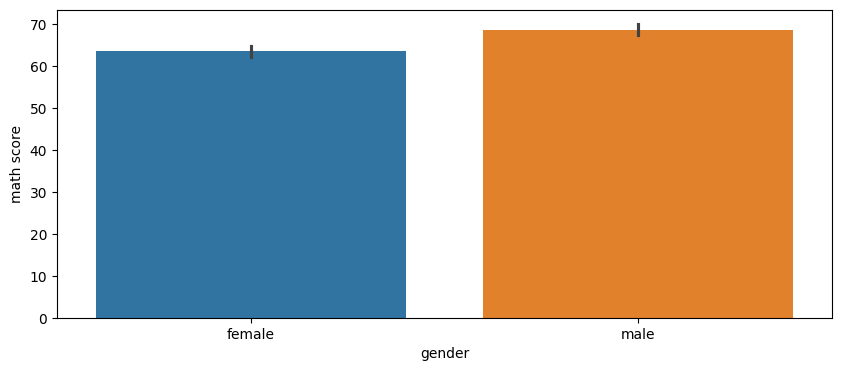

In [46]:
# figsize of 10 width by 4 height
plt.figure(figsize=(10,4))

# barplot
sns.barplot(x="gender", y="math score", data=df, hue="gender")

<Axes: xlabel='gender', ylabel='math score'>

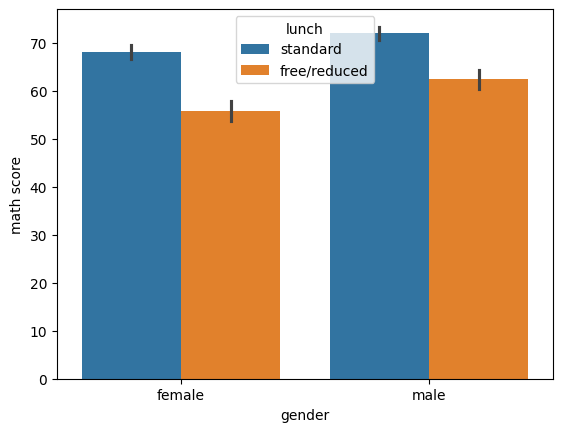

In [47]:
sns.barplot(x="gender", y="math score", data=df, hue="lunch")

Text(0.5, 1.0, 'Gender vs. Reading Scores')

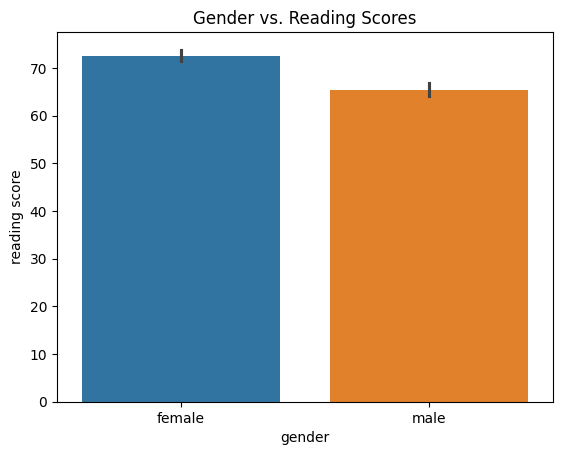

In [48]:
sns.barplot(x="gender", y="reading score", data=df, hue='gender')
plt.title("Gender vs. Reading Scores")

In [49]:
df.groupby('parental level of education')['math score'].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

## Step 4: Data Preprocessing

In [50]:
columns_to_remove = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

df.drop(columns_to_remove, axis=1, inplace=True)
df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [51]:
# adding new feature to the dataset
average_marks = []
for math, reading, writing in df[['math score', 'reading score', 'writing score']].values:
    average_marks.append((math + reading + writing) / 3)

df['average_marks'] = average_marks
df.head()

,math score,reading score,writing score,average_marks
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333
